# How to think about treating heterogeneous initial populations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import sys

It appears that a gamma distribution may be a good fit for picking the hetereogenous population. Normal distributions also work.

In [2]:
u_N = .05
u_SCM = .005
u_TM = 0.30
u_CM = 0.35
u_EM = 0.25
std = 0.2

In [3]:
#pick my initial population
sim = 10000
x = abs(np.random.normal([u_N, u_SCM, u_TM, u_CM, u_EM], std, np.broadcast_arrays(sim,5)))
y = np.sum(x, axis = 1)

for i in range(sim):
    x[i] = x[i]/y[i]

In [4]:
d = 1

p_n = 0.0015 * d
p_scm = 0.00015 * d
p_tm = 0.005 * d
p_cm = 0.0014 * d
p_em = 0.005 * d

d_n = 0.000666
d_scm = 0.005
d_tm = 0.01
d_cm = 0.00666
d_em = 0.011

n = 0.0017
a = 0.003+n
w = 0.1

d_ALL = 0.03

## Define Model

In [5]:
#Define the model
def model(z,t):
    L_n = z[0]
    L_scm = z[2]
    L_tm = z[4]
    L_cm = z[6] 
    L_em = z[8]
    
    A_n = z[1]
    A_scm = z[3]
    A_tm = z[5]
    A_cm = z[7]
    A_em = z[9]
    
    
    #for drug dosings
    dL_ndt = (p_n - d_n)*L_n - a*L_n + w*A_n
    dA_ndt = a*L_n - d_ALL*A_n - w*A_n
    
    dL_scmdt = (p_scm - d_scm)*L_scm - a*L_scm + w*A_scm
    dA_scmdt = a*L_scm - d_ALL*A_scm - w*A_scm
    
    dL_tmdt = (p_tm - d_tm)*L_tm - a*L_tm + w*A_tm
    dA_tmdt = a*L_tm - d_ALL*A_tm - w*A_tm
    
    dL_cmdt = (p_cm - d_cm)*L_cm - a*L_cm + w*A_cm
    dA_cmdt = a*L_cm - d_ALL*A_cm - w*A_cm
    
    dL_emdt = (p_em - d_em)*L_em - a*L_em + w*A_em
    dA_emdt = a*L_em - d_ALL*A_em - w*A_em
    
    
    dzdt = [dL_ndt,dA_ndt,
            dL_scmdt,dA_scmdt,
            dL_tmdt,dA_tmdt,
            dL_cmdt,dA_cmdt,
            dL_emdt,dA_emdt
            ]
    return dzdt

## Set Initial Conditions and Solve for Those Conditions

In [6]:
#initial conditions, there are three
z0 = np.zeros(10)
ctr=0
for i in range(5):
    z0[ctr] = x[5][i]*10**6
    ctr+=2

#number of time points
tn = 30001

#time points
t = np.linspace(0,tn-1, tn)


#store solutions
#Drug Doses
L_n = np.empty_like(t)
L_scm = np.empty_like(t)
L_tm = np.empty_like(t)
L_cm = np.empty_like(t)
L_em = np.empty_like(t)

A_n = np.empty_like(t)
A_scm = np.empty_like(t)
A_tm = np.empty_like(t)
A_cm = np.empty_like(t)
A_em = np.empty_like(t)
Total = np.empty_like(t)


#record intial

L_n[0] = z0[0]
L_scm[0] = z0[2]
L_tm[0] = z0[4]
L_cm[0] = z0[6] 
L_em[0] = z0[8]

A_n[0] = z0[1]
A_scm[0] = z0[3]
A_tm[0] = z0[5]
A_cm[0] = z0[7]
A_em[0] = z0[9]

Total[0] = np.sum(z0)

#Solve the ODE
for i in range(1,tn):
    tspan = [t[i-1],t[i]]
    # solve for next step
    z = odeint(model,z0,tspan)
    # store solution for plotting
        
    L_n[i] = z[1][0]
    L_scm[i] = z[1][2]
    L_tm[i] = z[1][4]
    L_cm[i] = z[1][6] 
    L_em[i] = z[1][8]
    
    A_n[i] = z[1][1]
    A_scm[i] = z[1][3]
    A_tm[i] = z[1][5]
    A_cm[i] = z[1][7]
    A_em[i] = z[1][9]
    
    Total[i]=np.sum(z[1])
    z0 = z[1] 
    



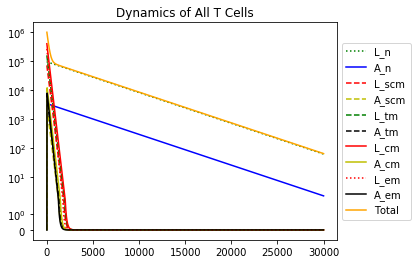

In [7]:
fig, ax = plt.subplots(figsize = (15,4), sharey = True)
ax = plt.subplot(121)
plt.title('Dynamics of All T Cells')
plt.plot(t,L_n,'g:',label='L_n')
plt.plot(t,A_n,'b-',label='A_n')
plt.plot(t,L_scm,'r--',label='L_scm')
plt.plot(t,A_scm,'y--',label='A_scm')
plt.plot(t,L_tm,'g--',label='L_tm')
plt.plot(t,A_tm,'k--',label='A_tm')
plt.plot(t,L_cm,'r',label='L_cm')
plt.plot(t,A_cm,'y-',label='A_cm')
plt.plot(t,L_em,'r:',label='L_em')
plt.plot(t,A_em,'k-',label='A_em')
plt.plot(t,Total,'orange', label = 'Total')
plt.yscale('symlog')

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Get the reduction ratio

In [90]:
#Set list for Pinkevych cure and hill cure
hill_cure = 10**2
p_cure = 10**3

hill_years = []
p_years = []

In [9]:
tmp = np.zeros([int(sim),10])
ctr=0
for i in range(5):
    tmp[:,ctr] = x[:,i]*10**6
    ctr+=2

In [112]:
#initial conditions, there are three

for sims in range(sim):
    z0 = tmp[sims]

    #number of time points
    tn = 35001
    b = 1000

    #time points
    t = np.linspace(0,tn-1, b)


    #store solutions
    #Drug Doses
    L_n = np.empty_like(t)
    L_scm = np.empty_like(t)
    L_tm = np.empty_like(t)
    L_cm = np.empty_like(t)
    L_em = np.empty_like(t)

    A_n = np.empty_like(t)
    A_scm = np.empty_like(t)
    A_tm = np.empty_like(t)
    A_cm = np.empty_like(t)
    A_em = np.empty_like(t)
    Total = np.empty_like(t)


    #record intial

    L_n[0] = z0[0]
    L_scm[0] = z0[2]
    L_tm[0] = z0[4]
    L_cm[0] = z0[6] 
    L_em[0] = z0[8]

    A_n[0] = z0[1]
    A_scm[0] = z0[3]
    A_tm[0] = z0[5]
    A_cm[0] = z0[7]
    A_em[0] = z0[9]

    Total[0] = np.sum(z0)

    #Solve the ODE
    for i in range(1,b):
        tspan = [t[i-1],t[i]]
        # solve for next step
        z = odeint(model,z0,tspan)
        # store solution for plotting

        L_n[i] = z[1][0]
        L_scm[i] = z[1][2]
        L_tm[i] = z[1][4]
        L_cm[i] = z[1][6] 
        L_em[i] = z[1][8]

        A_n[i] = z[1][1]
        A_scm[i] = z[1][3]
        A_tm[i] = z[1][5]
        A_cm[i] = z[1][7]
        A_em[i] = z[1][9]

        Total[i]=np.sum(z[1])
        z0 = z[1] 

    if t[Total<hill_cure].shape[0] ==0:
        hill_years.append(0)
    else:
        hill_years.append(t[Total <hill_cure][0])
        
    if t[Total<p_cure].shape[0] ==0:
        p_years.append(0)
    else:
        p_years.append(t[Total<p_cure][0])
    
    sys.stdout.write('\r {}'.format(sims) )

 9999

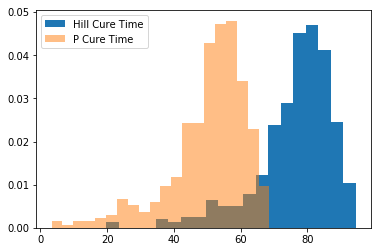

In [98]:
plt.hist(np.divide(hill_years,365), label = 'Hill Cure Time', density = True, bins = 20)
plt.hist(np.divide(p_years,365), label = 'P Cure Time', density= True, bins = 20, alpha = 0.5)
plt.legend()

In [136]:
import pickle
pickle.dump(hill_years[-10000:], open('hill_years.p', 'wb'))
pickle.dump(p_years[-10000:], open('p_years.p', 'wb'))
pickle.dump(x, open('t_pop', 'wb'))

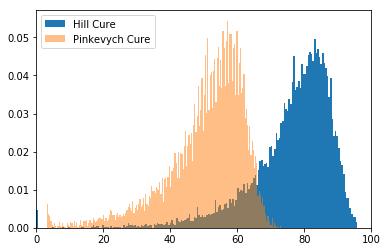

In [163]:
hill = plt.hist(np.divide(hill_years[-10000:],365), density = True, bins = 200, label = 'Hill Cure')
p = plt.hist(np.divide(p_years[-10000:], 365), density = True, bins = 200, label = 'Pinkevych Cure', alpha = 0.5)
plt.xlim([0,100])
plt.legend()

In [154]:
cell_labels = ['T_n', 'T_scm', 'T_tm', 'T_cm', 'T_em']

These heatmaps are colored by population Tn cells

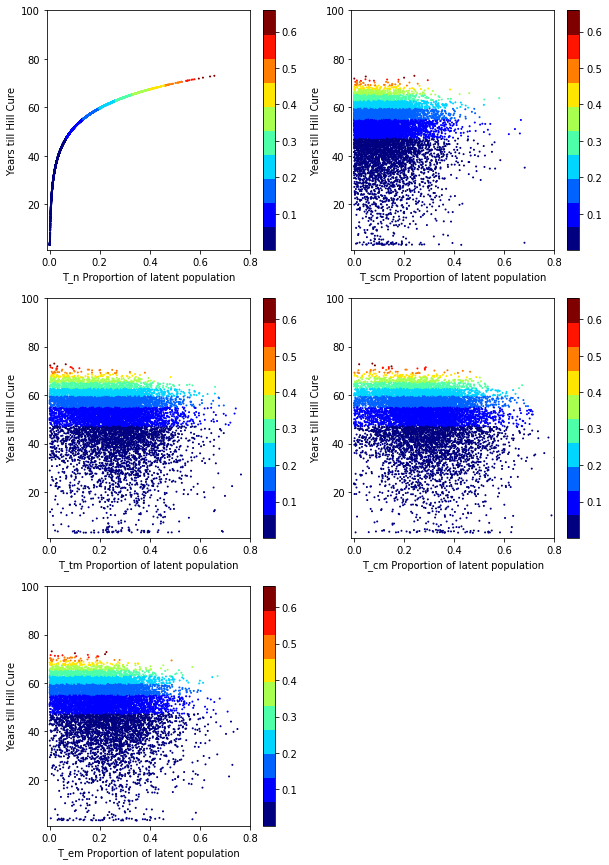

In [202]:
plt.figure(figsize = (10,15))
for i in range(5):
    plt.subplot(3,2,i+1)
    plt.scatter(x.T[i], np.divide(p_years[-10000:], 365), s = 1, c = x.T[0],cmap =plt.cm.get_cmap('jet', 10) ,label = cell_labels[i]+' Cells')
    plt.xlabel(cell_labels[i]+' Proportion of latent population')
    plt.ylabel('Years till Hill Cure')
    plt.ylim([1,100])
    plt.xlim([-0.01,0.8])
    plt.colorbar()

Summary: 
Vaguely interesting, maybe not. 
It looks like, a fairly obvious answer, is that the longest living cell is going to be the barrier for reducing the latent population. This is simply suggesting that we should seriously consider this naive T cell population even if it make up a tiny population of the latent T cells. If you look at how steep that initial slope is for the naive T cells proportions vs. years to cure is, then one should seriously consider how to think about effectively treating these populations.